# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** IMAM NUR RIZKY GUSMAN
- **Email:** rizky.gusman03@gmail.com / m004d4ky1642@bangkit.academy
- **ID Dicoding:** in_rizkygusman

## Menentukan Pertanyaan Bisnis

- Pada pukul berapa persewaan sepeda mengalami puncak tertinggi dan terendah?
- Apa musim dengan jumlah sewa sepeda tertinggi dan terendah?
- Berapa banyak pelanggan biasa dan pelanggan terdaftar? Bagaimana berbandingan keduanya?
- Manakah sewa yang lebih tinggi antara weekday dan weekend?
- Bagaimana hubungan rata-rata sewa dengan cuaca?


## Import Semua Packages/Library yang Digunakan

In [2]:
#Library yang digunakan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

## Data Wrangling

### Gathering Data

In [3]:
#Import Data Day
df_day = pd.read_csv("day.csv");df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
#Import data hour
df_hour = pd.read_csv("hour.csv");df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

In [5]:
#Check datatype dari df_day
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
#Check datatype dari df_hour
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
#Cek duplikasi data
df_day.duplicated().sum()

0

In [8]:
df_hour.duplicated().sum()

0

Tidak terdapat duplikasi pada dataset Bike Sharing

In [9]:
#Check missing value dari df_day
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
#Check missing value dari df_hour
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data cukup baik karena tidak memiliki missing value

In [11]:
#Cek Statistika Deskriptif
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [12]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


- Kolom instant tidak digunakan karena merupakan kolom record index
- Nama kolom perlu disesuaikan untuk mempermudah analisis
- Beberapa kolom perlu disesuaikan tipenya seperti dteday menjadi tipe datetime dan beberapa tipe data kategorik lainnya
- Variabel dummy pada dataframe perlu disesuaikan untuk kemudahan explorasi

### Cleaning Data

In [13]:
#Drop kolom instant
df_day.drop(['instant'], axis = 1, inplace= True)
df_hour.drop(['instant'], axis = 1, inplace= True)

In [14]:
#Sesuaikan kolom dtday
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

In [15]:
#Sesuaikan data bertipe kategorik
kolom = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for i in kolom:
    df_day[i] =  df_day[i].astype('category')
    df_hour[i] =  df_hour[i].astype('category')

In [16]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: category(6), datetime64[ns](1), float64(4), int64(4)
memory usage: 57.1

In [17]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  category      
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  category      
 6   weekday     17379 non-null  category      
 7   workingday  17379 non-null  category      
 8   weathersit  17379 non-null  category      
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: category(6), dateti

In [18]:
# Fill dummy variable
# fill Season dummy
seas_dum = {1: 'Spring',2: 'Summer', 3: 'Fall', 4: 'Winter'}
df_day['season'] = df_day['season'].map(seas_dum)
df_hour['season'] = df_hour['season'].map(seas_dum)

# fill year
year_dum = {0: '2011', 1: '2012'}
df_day['year'] = df_day['yr'].map(year_dum)
df_hour['year'] = df_hour['yr'].map(year_dum)

# fill month dummy
mont_dum = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df_day['month'] = df_day['mnth'].map(mont_dum)
df_hour['month'] = df_hour['mnth'].map(mont_dum)

# fill weekdays dummy
weekday_dum = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
df_day['weekdays'] = df_day['weekday'].map(weekday_dum)
df_hour['weekdays'] = df_hour['weekday'].map(weekday_dum)

# fill workingday dummy (if day is neither weekend nor holiday is 1, otherwise is 0.)
workingday_dum = {0: 'otherwise', 1: 'holiday'}
df_day['workingday'] = df_day['workingday'].map(workingday_dum)
df_hour['workingday'] = df_hour['workingday'].map(workingday_dum)

# Fill weather_situation dummy
weather_dum = {1: 'clear', 2: 'mist', 3: 'light_snow', 4: 'Heavy_rain'}
df_day['weather_situation'] = df_day['weathersit'].map(weather_dum)
df_hour['weather_situation'] = df_hour['weathersit'].map(weather_dum)

In [19]:
#Menyesuaikan nama kolom
df_day.rename(columns={'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity', 'hr':'hours'},inplace=True)
df_hour.rename(columns={'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity', 'hr':'hours'},inplace=True)

In [20]:
def weekstatus(df):
    weekday_stat = {0: 'Weekend', 1: 'Weekday', 2: 'Weekday', 3: 'Weekday', 4: 'Weekday', 5: 'Weekday', 6: 'Weekend'}
    df['weekday_type'] = df['weekday'].map(weekday_stat)
    return df
df_day = weekstatus(df_day)
df_hour = weekstatus(df_hour)

## Exploratory Data Analysis (EDA)

### Explore Data df_hour

In [21]:
# sewa base on jam
df_hour.groupby(by="hours").agg({"count_cr": ["sum"]})

,count_cr
,sum
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


Waktu dengan sewa tertinggi ada pada pukul 17.00 dengan jumlah sewa 336860 unit dan sewa terendah ada pada pukul 04.00 dengan jumlah sewa 4428 unit.

In [22]:
df_hour.groupby(by="season",observed=False).count_cr.sum().sort_values(ascending=False).reset_index()

,season,count_cr
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


In [23]:
df_hour.groupby('weather_situation',observed=False)['count_cr'].sum().reset_index().sort_values("count_cr")

,weather_situation,count_cr
3,Heavy_rain,223
2,light_snow,158331
1,mist,795952
0,clear,2338173


In [24]:
df_hour['weathersit'].corr(df_hour['count_cr'])

-0.14242613813809538

Rata-rata sewa berdasarkan cuaca tidak dapat dilihat hubungannya secara langsung, tetapi rata-rata sewa pada cuaca cerah memiliki kecenderungan lebih tinggi dibanding cuaca lainnya.
Jika dihitung secara matematis menggunakan korelasi, hubungan kedua hal itu cenderung kecil hanya bernilai 14.2%.
Maka hubungan dapat lebih terlihat secara logika dengan perbandingan jumlah rata-rata sewanya, semakin ekstrim cuaca, maka sewa cenderung semakin rendah.

Perbedaan hasil pada data hour dan data day mengartikan bahwa cuaca berdasarkan jam lebih sensitif karena menurut data tidak ada cuaca ekstrim yang berlangsung selama satu hari penuh.

### Explore Data df_day

In [25]:
# sewa base on season
df_day.groupby(by="season",observed=False).count_cr.sum().sort_values(ascending=False).reset_index()

,season,count_cr
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


Diantara empat musim yang terjadi, musim gugur memiliki sewa yang tertinggi diikuti dengan musim panas, musim dingin, dan sewa terendah ada pada musim semi.

In [26]:
# sewa base on registered dan casual 
df_day.groupby(by="year").agg({"registered": ["sum"],"casual": ["sum"]})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


Sebagian besar pengguna sewa baik tahun 2011 atau 2012 merupakan pengguna terdaftar. Pelanggan terdaftar tahun 2011 sebesar 995851 dan 2012 sebesar 1676811.

In [27]:
df_day.groupby('weekday_type', observed=False)['count_cr'].mean().reset_index().sort_values("count_cr")

,weekday_type,count_cr
1,Weekend,4389.685714
0,Weekday,4550.566219


Rata-rata sewa pada weekday cenderung lebih tinggi dibanding sewa pada weekend, tetapi perbedaan tersebut tidak signifikan.

In [28]:
df_day.groupby('weather_situation',observed=False)['count_cr'].sum().reset_index().sort_values("count_cr")

,weather_situation,count_cr
2,light_snow,37869
1,mist,996858
0,clear,2257952


In [29]:
df_day['weathersit'].corr(df_day['count_cr'])

-0.29739123883466373

Rata-rata sewa berdasarkan cuaca tidak dapat dilihat hubungannya secara langsung, tetapi rata-rata sewa pada cuaca cerah memiliki kecenderungan lebih tinggi dibanding cuaca lainnya.
Jika dihitung secara matematis menggunakan korelasi, hubungan kedua hal itu cenderung kecil hanya bernilai 29.7%.
Maka hubungan dapat lebih terlihat secara logika dengan perbandingan jumlah rata-rata sewanya, semakin ekstrim cuaca, maka sewa cenderung semakin rendah.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

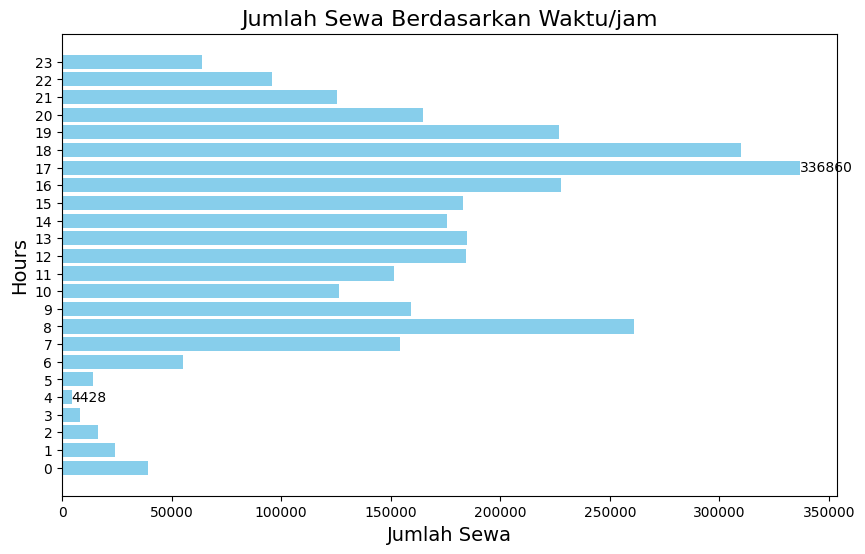

In [30]:
# Pengelompokkan dan agregasi
one_df = df_hour.groupby(by="hours").agg({"count_cr": ["sum"]})
# Membuat bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(one_df.index, one_df[('count_cr', 'sum')], color='skyblue') 
highest_value = one_df[('count_cr', 'sum')].idxmax()
lowest_value = one_df[('count_cr', 'sum')].idxmin()
plt.text(one_df.loc[highest_value][('count_cr', 'sum')] + 1, highest_value, str(int(one_df.loc[highest_value][('count_cr', 'sum')])), ha='left', va='center')
plt.text(one_df.loc[lowest_value][('count_cr', 'sum')] + 1, lowest_value, str(int(one_df.loc[lowest_value][('count_cr', 'sum')])), ha='left', va='center') 
# Menambahkan judul dan label sumbu
plt.title('Jumlah Sewa Berdasarkan Waktu/jam', fontsize=16)
plt.xlabel('Jumlah Sewa', fontsize=14)
plt.ylabel('Hours', fontsize=14)
plt.yticks(one_df.index)
plt.show()

Waktu dengan sewa tertinggi ada pada pukul 17.00 dengan jumlah sewa 336860 unit dan sewa terendah ada pada pukul 04.00 dengan jumlah sewa 4428 unit.

### Pertanyaan 2:

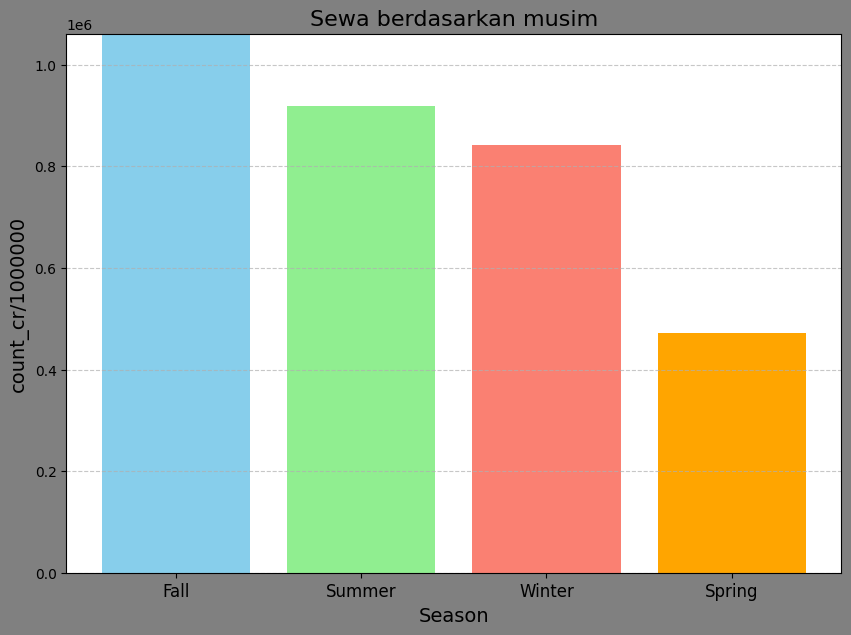

In [31]:
two_df = df_hour.groupby(by="season", observed=False).count_cr.sum().sort_values(ascending=False).reset_index()
# Membuat bar chart
plt.figure(figsize=(10, 7),facecolor='grey')
colors = ['skyblue', 'lightgreen', 'salmon', 'orange']
plt.bar(two_df['season'], two_df['count_cr'], color=colors)
# Menambahkan judul dan label sumbu
plt.title('Sewa berdasarkan musim', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('count_cr/1000000', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Menyesuaikan batas sumbu y berdasarkan nilai sumbu y aktual
plt.ylim(0, two_df['count_cr'].max() + 10)
# Menentukan label sumbu x sesuai dengan nilai sumbu y aktual
plt.xticks(two_df['season'], fontsize=12)
plt.show()

Diantara empat musim yang terjadi, musim gugur memiliki sewa yang tertinggi diikuti dengan musim panas, musim dingin, dan sewa terendah ada pada musim semi.

### Pertanyaan 3:

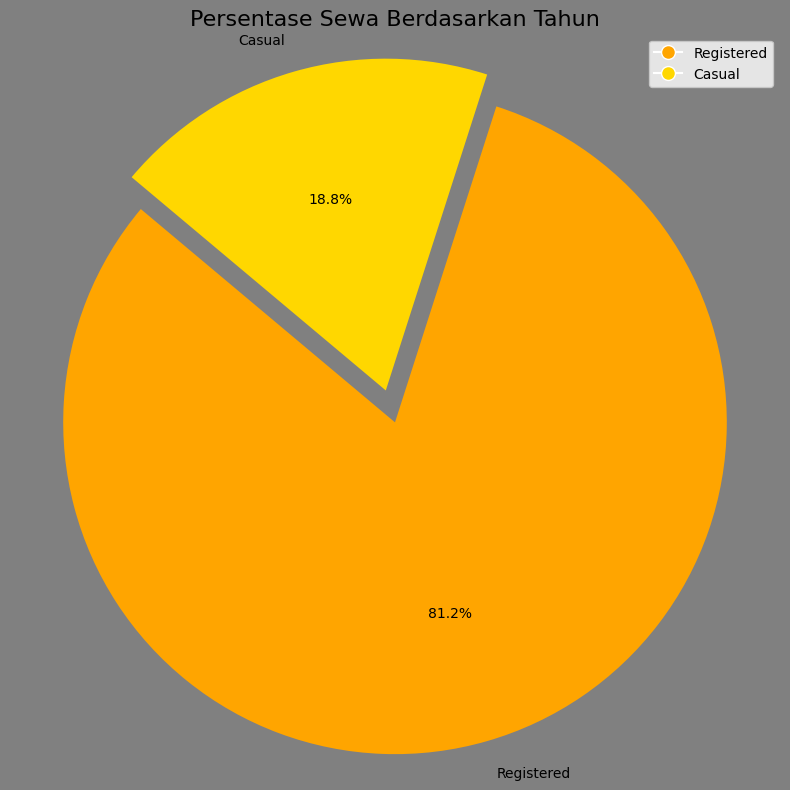

In [32]:
# Mengelompokkan data dan menghitung total registered dan casual untuk setiap tahun
yearly_data = df_day.groupby(by="year").agg({"registered": "sum", "casual": "sum"})
# Membuat pie chart
fig, ax = plt.subplots(figsize=(8, 8), facecolor='grey')  # Mengatur facecolor menjadi 'none' untuk menghilangkan background
# Menyiapkan data untuk pie chart
sizes = yearly_data.sum()
labels = ['Registered', 'Casual']
colors = ['#FFA500', '#FFD700']  # Warna orange: orange dan gold
explode = (0.1, 0)
# Plot pie chart dengan menampilkan nilai persentase
wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)
ax.set_title('Persentase Sewa Berdasarkan Tahun', fontsize=16)
ax.axis('equal')  # Memastikan pie chart berbentuk lingkaran
# Menambahkan garis sebagai legenda
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Registered', markerfacecolor='#FFA500', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Casual', markerfacecolor='#FFD700', markersize=10)]
ax.legend(handles=legend_elements, loc='upper right')
# Menampilkan pie chart
plt.tight_layout()
plt.show()

Sebagian besar pengguna sewa baik tahun 2011 atau 2012 merupakan pengguna terdaftar. Pelanggan terdaftar tahun 2011 sebesar 995851 dan 2012 sebesar 1676811.
Berdasarkan visual diatas, jumlah total pengguna terdaftar sebesar 81.2% dan pengguna biasa sebesar 18.8%.

### Pertanyaan 4:

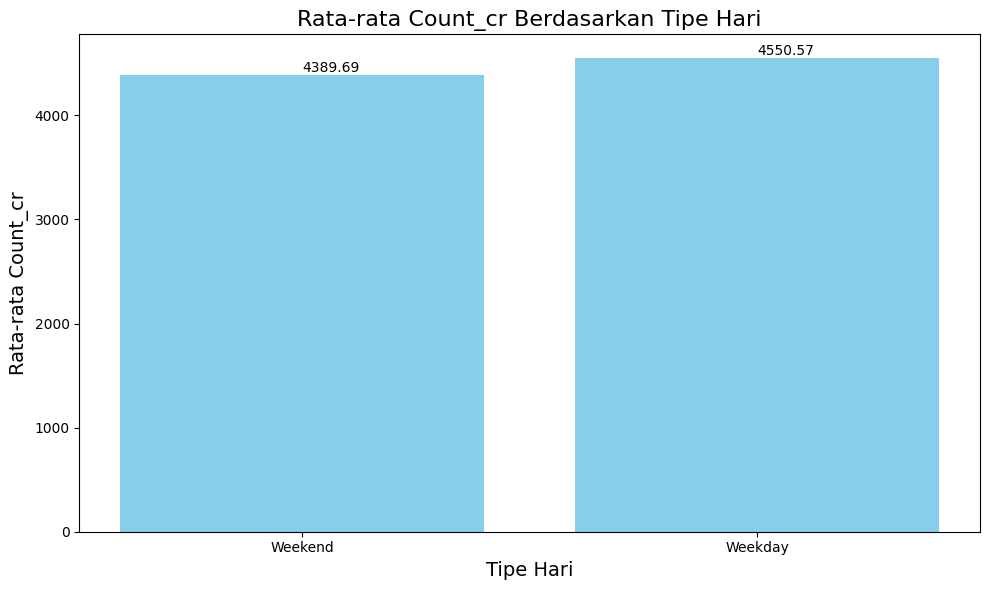

In [33]:
four_df = df_day.groupby('weekday_type', observed=False)['count_cr'].mean().reset_index().sort_values("count_cr")

# Membuat bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(four_df['weekday_type'], four_df['count_cr'], color='skyblue')

# Menambahkan label pada bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

# Menambahkan judul dan label sumbu
plt.title('Rata-rata Count_cr Berdasarkan Tipe Hari', fontsize=16)
plt.xlabel('Tipe Hari', fontsize=14)
plt.ylabel('Rata-rata Count_cr', fontsize=14)

# Menampilkan plot
plt.tight_layout()
plt.show()

Rata-rata sewa pada weekday cenderung lebih tinggi dibanding sewa pada weekend, tetapi perbedaan tersebut tidak signifikan.
Secara visual dapat dilihat bahwa hanya terdapat sedikit perbedaan diantara keduanya.

### Pertanyaan 5:

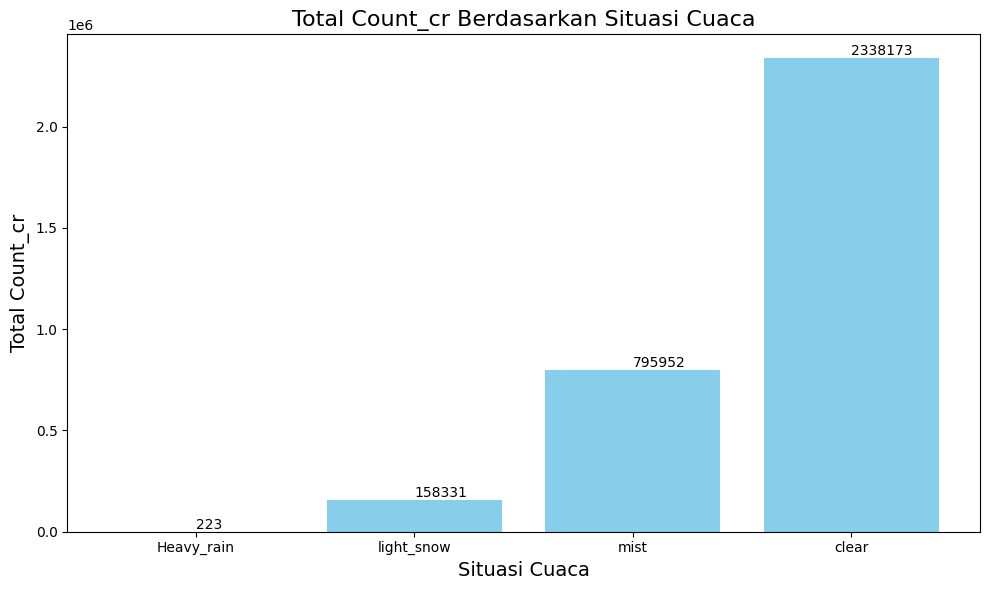

In [34]:
five_df = df_hour.groupby('weather_situation', observed=False)['count_cr'].sum().reset_index().sort_values("count_cr")
plt.figure(figsize=(10, 6))
bars = plt.bar(five_df['weather_situation'], five_df['count_cr'], color='skyblue')
# Menambahkan label pada bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', va='bottom')
plt.title('Total Count_cr Berdasarkan Situasi Cuaca', fontsize=16)
plt.xlabel('Situasi Cuaca', fontsize=14)
plt.ylabel('Total Count_cr', fontsize=14)
plt.tight_layout()
plt.show()

Rata-rata sewa berdasarkan cuaca tidak dapat dilihat hubungannya secara langsung, tetapi rata-rata sewa pada cuaca cerah memiliki kecenderungan lebih tinggi dibanding cuaca lainnya.
Jika dihitung secara matematis menggunakan korelasi, hubungan kedua hal itu cenderung kecil hanya bernilai 14.2%.
Maka hubungan dapat lebih terlihat secara logika dengan perbandingan jumlah rata-rata sewanya, semakin ekstrim cuaca, maka sewa cenderung semakin rendah.

Perbedaan hasil pada data hour dan data day mengartikan bahwa cuaca berdasarkan jam lebih sensitif karena menurut data tidak ada cuaca ekstrim yang berlangsung selama satu hari penuh.

## Conclusion

- Conclution pertanyaan 1 :
Kecenderungan pelanggan sewa tertinggi ada pada pukul 17.00 dengan jumlah 336860 unit dan jumlah sewa terendah ada pada pukul 04.00 dengan jumlah 4428 unit.
- Conclution pertanyaan 2 :
Kecenderungan pelanggan pada menyewa tertinggi yaitu pada musim gugur dan sewa terendah terjadi pada musim semi.
- Conclution pertanyaan 3 :
Jumlah total pengguna terdaftar sebesar 81.2% dan pengguna biasa sebesar 18.8%.
- Conclution pertanyaan 4 :
Rata-rata sewa pada weekday cenderung lebih tinggi dibanding sewa pada weekend, tetapi perbedaan tersebut tidak signifikan.
- Conclution pertanyaan 5 :
Kecenderungan hubungan antara rata-rata sewa dengan cuaca dapat lebih terlihat secara logika dengan perbandingan jumlah rata-rata sewanya, semakin ekstrim cuaca, maka sewa cenderung semakin rendah.


### Contoh Penerapan Teknik Analisis Lanjutan yang telah diterapkan

Menggunakan statistika deskriptif untuk mengetahui karakteristik data

In [35]:
print(df_day.describe())
print(df_hour.describe())

                    dteday          yr        temp       atemp    humidity  \
count                  731  731.000000  731.000000  731.000000  731.000000   
mean   2012-01-01 00:00:00    0.500684    0.495385    0.474354    0.627894   
min    2011-01-01 00:00:00    0.000000    0.059130    0.079070    0.000000   
25%    2011-07-02 12:00:00    0.000000    0.337083    0.337842    0.520000   
50%    2012-01-01 00:00:00    1.000000    0.498333    0.486733    0.626667   
75%    2012-07-01 12:00:00    1.000000    0.655417    0.608602    0.730209   
max    2012-12-31 00:00:00    1.000000    0.861667    0.840896    0.972500   
std                    NaN    0.500342    0.183051    0.162961    0.142429   

       wind_speed       casual   registered     count_cr  
count  731.000000   731.000000   731.000000   731.000000  
mean     0.190486   848.176471  3656.172367  4504.348837  
min      0.022392     2.000000    20.000000    22.000000  
25%      0.134950   315.500000  2497.000000  3152.000000  
50

Variansi, Analisis ini berguna untuk mengidentifikasi apakah data yang ada dapat diolah menjadi sebuah kesimpulan atau tidak. Karena data yang memiliki varians terlalu kecil mengindikasikan bahwa data merupakan data homogen.

In [36]:
print(df_day.var(numeric_only=True))
print(df_hour.var(numeric_only=True))

yr            2.503420e-01
temp          3.350767e-02
atemp         2.655635e-02
humidity      2.028605e-02
wind_speed    6.005920e-03
casual        4.714504e+05
registered    2.434400e+06
count_cr      3.752788e+06
dtype: float64
yr                0.250008
hours            47.808998
temp              0.037078
atemp             0.029532
humidity          0.037222
wind_speed        0.014967
casual         2430.986021
registered    22909.027999
count_cr      32901.461104
dtype: float64


Digunakan untuk menjawab pertanyaan 2

In [37]:
#Clustering Analysis
df_hour.groupby(by="weather_situation",observed=False).count_cr.nunique().sort_values(ascending=False)

weather_situation
clear         848
mist          649
light_snow    368
Heavy_rain      3
Name: count_cr, dtype: int64

Digunakan untuk menjawab pertanyaan 5

In [38]:
#Correlation
print('Analisis korelasi data harian :',df_day['weathersit'].corr(df_day['count_cr']))
print('Analisis korelasi data per-jam :',df_hour['weathersit'].corr(df_hour['count_cr']))

Analisis korelasi data harian : -0.29739123883466373
Analisis korelasi data per-jam : -0.14242613813809538


In [39]:
df_day.to_csv('day_after.csv', index=False)
df_hour.to_csv('hour_after.csv', index=False)